<a href="https://colab.research.google.com/github/abhiWriteCode/Small-Machine-Learning-Projects/blob/master/mnist_Hand_Written_Digit_Recognition_using_convolution_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
train_X = (train_X/255.0).reshape(*train_X.shape, 1)
test_X = (test_X/255.0).reshape(*test_X.shape, 1)

In [4]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
split = len(test_X)//2
val_X, val_y = test_X[:split], test_y[:split]
test_X, test_y = test_X[split:], test_y[split:]

** Create Model **

In [6]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(3, 3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=20, kernel_size=(1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 80))
model.add(Dense(activation = 'softmax', units = 10))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 20)        220       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                57680     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                810       
Total para

In [7]:
model.fit(train_X, train_y, epochs=20, batch_size=256, validation_data=(val_X, val_y))

Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.5317 - acc: 0.8598 - val_loss: 0.2816 - val_acc: 0.9176
Epoch 2/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.1649 - acc: 0.9508 - val_loss: 0.1825 - val_acc: 0.9396
Epoch 3/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.1159 - acc: 0.9652 - val_loss: 0.1260 - val_acc: 0.9606
Epoch 4/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0922 - acc: 0.9721 - val_loss: 0.1176 - val_acc: 0.9616
Epoch 5/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0776 - acc: 0.9766 - val_loss: 0.0871 - val_acc: 0.9712
Epoch 6/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0670 - acc: 0.9797 - val_loss: 0.0778 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0

In [8]:
loss, acc = model.evaluate(test_X, test_y)

print('loss: ', loss)
print('Accuracy: ', acc)

5000/5000 [==============================] - 1s 226us/step
loss:  0.02317217102535651
Accuracy:  0.993


In [0]:
predict_y = model.predict(test_X)

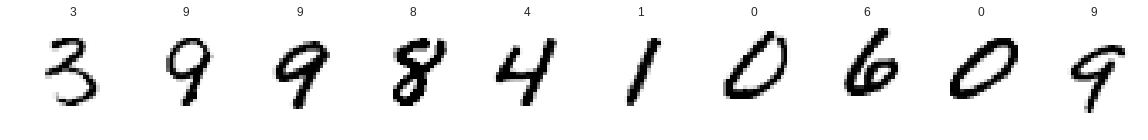

In [10]:
plt.figure(figsize=(20, 6))

n = 10
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(test_X[i].reshape(28, 28))
  plt.title(np.argmax(predict_y[i]))
  plt.axis('off')